In [ ]:
import networkx as nx
import pandas as pd
from community import community_louvain
import json
import pprint
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
North_Am=['Aruba', 'Curaçao', 'Panama', 'United States', 'Venezuela', 'Canada', 'Mexico', 'Antigua and Barbuda', 'Barbados', 'Bahamas, The', 'Turks and Caicos Isl.', 'Cayman Islands', 'Bermuda', 'Jamaica', 'Guatemala', 'El Salvador', 'Nicaragua', 'Honduras', 'Dominican Republic', 'Haiti', 'Cuba', 'Costa Rica', 'Trinidad and Tobago', 'Guyana', 'Suriname', 'Belize', 'St. Kitts and Nevis', 'St. Lucia', 'Dominica', 'St. Vincent and the Grenadines', 'Grenada', 'Antigua and Barbuda', 'St. Vincent and the Grenadines']

Europe=['United Kingdom', 'Netherlands', 'Germany', 'France', 'Ireland', 'Belgium', 'Spain', 'Switzerland', 'Italy', 'Norway', 'Sweden', 'Denmark', 'Portugal', 'Romania', 'Bosnia and Herzegovina', 'Hungary', 'Andorra', 'Finland', 'Serbia, FR(Serbia/Montenegro)', 'Bulgaria', 'Cyprus', 'Belarus', 'Latvia', 'Lithuania', 'Estonia', 'Moldova', 'North Macedonia', 'Luxembourg', 'Malta', 'San Marino', 'Monaco', 'Liechtenstein', 'Holy See']

Asia=['China', 'Hong Kong, China', 'Turkey', 'United Arab Emirates', 'Korea, Rep.', 'Japan', 'Singapore', 'Iran, Islamic Rep.', 'Vietnam', 'Malaysia', 'Israel', 'Kazakhstan', 'Pakistan', 'Uzbekistan', 'Iraq', 'Thailand', 'Azerbaijan', 'Georgia', 'Armenia', 'Qatar', 'Lebanon', 'Oman', 'Kuwait', 'Jordan', 'Yemen, Rep.', 'Syrian Arab Republic', 'Tajikistan', 'Kyrgyz Republic', 'Turkmenistan', 'Bahrain', 'Afghanistan']
South_Am=['Colombia', 'Ecuador', 'Brazil', 'Argentina', 'Chile', 'Peru', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'Venezuela']
Africa=['South Africa', 'Angola', 'Nigeria', 'Tanzania', 'Kenya', 'Uganda', 'Congo, Dem. Rep.', 'Sudan', 'Ethiopia(excludes Eritrea)', 'Egypt, Arab Rep.', 'Ghana', "Cote d'Ivoire", 'Madagascar', 'Cameroon', 'Zambia', 'Niger', 'Mozambique', 'Morocco', 'Uzbekistan', 'Mali', 'Burkina Faso', 'Mauritania', 'Somalia', 'Central African Republic', 'Nepal', 'Chad', 'Zimbabwe', 'Botswana', 'Rwanda', 'Tunisia', 'Senegal', 'South Sudan', 'Gambia, The', 'Namibia', 'Eswatini', 'Lesotho', 'Guinea', 'Burundi', 'Sierra Leone', 'Togo', 'Libya', 'Djibouti', 'Guinea-Bissau', 'Equatorial Guinea', 'Comoros', 'Mauritius', 'Western Sahara', 'Cape Verde', 'Sao Tome and Principe', 'Seychelles', 'Eritrea', 'Saint Helena']
Oceania=['Australia', 'New Zealand', 'Guam', 'French Polynesia', 'Fiji', 'Papua New Guinea', 'New Caledonia', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Marshall Islands', 'Federated States of Micronesia', 'Palau', 'Kiribati', 'Tuvalu', 'Nauru', 'Cook Islands', 'Niue', 'Tokelau', 'American Samoa', 'Wallis and Futuna', 'Norfolk Island', 'Guam']


In [ ]:
def directed(year):
    G=nx.DiGraph()
    df=pd.read_csv(f"graphs/{year}.csv")
    for index,row in df.iterrows():
        G.add_edge(row["source"],row["target"],weight=float(row[f"{year}"]))

    return G


In [ ]:
G=directed(2003)
print(G.edges(data=True))

In [ ]:
def undirected(year):
    G=nx.Graph()
    df=pd.read_csv(f"graphs/{year}.csv")
    for index, row in df.iterrows():
        source=row["source"]
        target=row["target"]
        weight=float(row[f"{year}"])
        if G.has_edge(row["source"],row["target"]):
            G[source][target]['weight']+=weight
        else:

            G.add_edge(source,target,weight=weight)

    return G



China's introduction to WTO

In [ ]:
x=[]
y=[]

for i in range(1993,2010):
    G=undirected(i)
    degree=sum([ G["China"][n]['weight'] for n in G.neighbors("China") ])
    x.append(i)
    y.append(degree)
plt.figure(figsize=(10,5))
plt.plot(x,y,marker='o')
plt.xlabel('year')
plt.ylabel('Degree (trillion US$)')
plt.title('Degree over the years')
plt.savefig('world_events/china_dist')


In [ ]:
x=[]
y=[]
for i in range(1993,2022):
    G=undirected(i)
    clus=nx.clustering(G,"China")
    x.append(i)
    y.append(clus)
plt.figure(figsize=(10,5))
plt.plot(x,y,marker='o')
plt.xlabel('year')
plt.ylabel('Clustering coefficient')
plt.title("China's clustering coefficient over the years")
plt.savefig('world_events/china_clus')


In [ ]:
imports=[]
exports=[]

for i in range(1993,2010):
    G=directed(i)
    in_deg=G.in_degree("China",weight='weight')
    out_deg=G.out_degree("China",weight='weight')
    imports.append(in_deg)
    exports.append(out_deg)

X_axis = np.arange(len(range(1993,2010))) 
plt.figure(figsize=(10,5))
plt.bar(X_axis - 0.2, imports, 0.4, label = 'indegree') 
plt.bar(X_axis + 0.2, exports, 0.4, label = 'outdegree')
plt.xticks(X_axis, range(1993,2010)) 
plt.xlabel("year") 
plt.ylabel("Degree ") 
plt.title("Indegree vs Outdegree of China") 
plt.legend() 
plt.show()  

2008 Recession

Continent wise net degree

In [ ]:
regions = {
    'North America': North_Am,
    'Europe': Europe,
    'Asia': Asia,
    'South America': South_Am,
    'Africa': Africa,
    'Oceania': Oceania
}

points = {
    'North America':[],
    'Europe': [],
    'Asia': [],
    'South America': [],
    'Africa': [],
    'Oceania': []
}


for i in range(2005,2011):
    G=undirected(i)
    for key in regions.keys():
        g=nx.subgraph(G,regions[key])
        total_degree = sum(weight for _, _, weight in g.edges(data='weight'))
        points[key].append(total_degree)

print(points)



    
    

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(range(2005,2011)),points['Asia'],label='Asia')

plt.plot(list(range(2005,2011)),points['Europe'],label='Europe')

plt.plot(list(range(2005,2011)),points['North America'],label='North America')

plt.plot(list(range(2005,2011)),points['South America'],label='South America')

plt.plot(list(range(2005,2011)),points['Africa'],label='Africa')

plt.plot(list(range(2005,2011)),points['Oceania'],label='Oceania')
plt.title("Net degree for every continent")
plt.xlabel("year")
plt.ylabel("Net degree (Trillion US$)")
plt.legend()
plt.savefig("world_events/continent_2008")


Betweenness of USA, European Union, China

In [ ]:
China=[]
United_states=[]
United_kingdom=[]
Germany=[]
Japan=[]

for i in range(2000,2017):
    G=undirected(i)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    China.append(betweenness_centrality["China"])
    United_states.append(betweenness_centrality["United States"])
    United_kingdom.append(betweenness_centrality["United Kingdom"])
    Germany.append(betweenness_centrality["Germany"])
    Japan.append(betweenness_centrality["Japan"])

    

    
plt.figure(figsize=(10,5))
plt.plot(range(2000,2017),China,label='China')
plt.plot(range(2000,2017),United_states,label='United States')
plt.plot(range(2000,2017),United_kingdom,label='United Kingdom')
plt.plot(range(2000,2017),Germany,label='Germany')
plt.plot(range(2000,2017),Japan,label='Japan')




plt.legend()
plt.savefig("world_events/betweenness_comp_2008")
# plt.show()

    
    

Brexit 

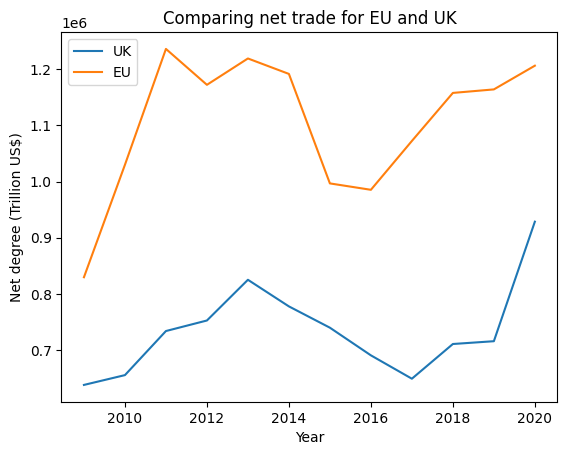

In [63]:
points_uk=[]
points_eu=[]

for i in range(2009,2021):
    G=undirected(i)
    degree1=sum(G['United Kingdom'][n]['weight'] for n in G.neighbors('United Kingdom'))
    degree2=sum(G['European Union'][n]['weight'] for n in G.neighbors('European Union'))
    points_uk.append(degree1)
    points_eu.append(degree2)

plt.plot(range(2009,2021),points_uk,label='UK')
plt.plot(range(2009,2021),points_eu,label='EU')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Net degree (Trillion US$)')
plt.title('Comparing net trade for EU and UK')
plt.savefig('world_events/Brexit')
